## Objectives

```
- Forward Propagation
- Activation Functions
- Loss Functions
- Cost Functions
- Deep Neural Network
- Backward Propagation
```

In [16]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Configure the backend
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

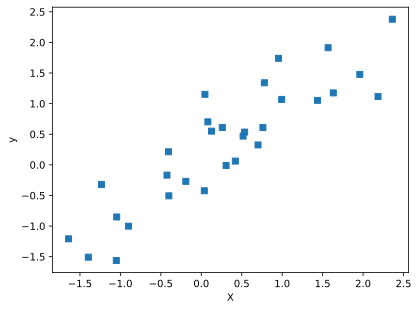

In [15]:
# Create data
N = 30
X = torch.randn(N, 1)
y = X + torch.randn(N, 1) / 2

# Visualize
plt.scatter(X, y, marker="s")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Build ANN Model

<br>

[![image.png](https://i.postimg.cc/NFkqbKP5/image.png)](https://postimg.cc/64qmppKX)

In [17]:
# Build model
ann_reg = nn.Sequential(
    nn.Linear(1, 1),  # input layer: 1 input and 1 output
    nn.ReLU(),  # Non-linear (activation) function
    nn.Linear(1, 1),  # output layer
)

ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
ann_reg.parameters()

<generator object Module.parameters at 0x7fc4481ceb20>

In [19]:
# Set up optimizer
learning_rate = 0.05
loss_function = nn.MSELoss()

# Optimizer: A variant of gradient descent to be implemented
optimizer = torch.optim.SGD(params=ann_reg.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [20]:
# Train model
num_epochs = 500
# Instantiate losses
losses = torch.zeros(size=num_epochs)
losses

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [21]:
for epoch_idx in range(num_epochs):
    # Forward prop
    y_pred = ann_reg(X)

    # Compute loss
    loss = loss_function(y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [22]:
# Make predictions
predictions = ann_reg(X)

# Final loss
test_loss = (predictions - y).pow(2).mean()
test_loss

tensor(0.2028, grad_fn=<MeanBackward0>)

In [27]:
losses[:8]

tensor([1.7466, 1.5745, 1.4340, 1.3188, 1.2238, 1.1450, 1.0791, 1.0235],
       grad_fn=<SliceBackward0>)

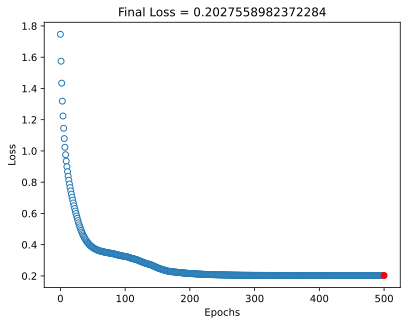

In [35]:
# Visualize
plt.plot(losses.detach(), "o", mfc="w", lw=0.1)
plt.plot(num_epochs, test_loss.detach(), "ro")
plt.title(f"Final Loss = {test_loss.item()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### Observation(s)

```
- The model train for too long since the loss had plateaued and stopped decreasing.
- Training for about 200 to 300 might have been better.
```

In [43]:
corr_value = np.corrcoef(y.T, predictions.detach().T)[0, 1]
corr_value

0.8909277183660305

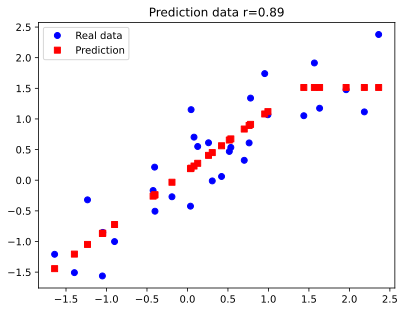

In [44]:
# Visualize the data
plt.plot(X, y, "bo", label="Real data")
plt.plot(X, predictions.detach(), "rs", label="Prediction")
# Display the correlation between the predicted values and the actual value.
plt.title(f"Prediction data r={corr_value:.2f}")
plt.legend()
plt.show()